In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (7.0, 4.0)
seaborn.mpl.rcParams['savefig.dpi'] = 100

import pandas as pd
import numpy as np

Необходимо построить на отрезке многочлен 4-ой степени производная которого на краях принимает нулевые значения. Нужно построить такой многочлен, который (в смысле квадратов отклонений) удален от данных измерений.

In [54]:
import numpy as np

t = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, -2, 3, -4])

Я знаю, что задачу можно решить точно, составив хтрую систему линейных уравнений и решив ее, но я в этом не очень хорошо разобрался, поэтому решу задачу численно составив функционал как сумма квадратов ошибок и применив численную оптимизацию при условии заданных ограничений, это я помню как делать и кроме того условие задачи не предполагает решение, которым задача должна быть решена.

Некотрые моменты реализованы не оптимальным образом (не стоит применять это в продакшене :)), это сделано в пользу экономии времени на экзамене.

Реализуем функцию которая создает функцию для рассчета значения многочлена степени в точке при заданных параметрах:

In [64]:
def create_poly(params):
    n = params.shape[0]
    def poly(x):
        return np.sum(np.array([params[i] * (x ** (n - i - 1)) for i in range(n)]))
    return poly

# просто проверка
f = create_poly(np.array([1,2,2]))
f(2)

10

Создадим функцию для расчета значения функционала для полинома с заданными паарметрами и заданных известных значений:

In [59]:
def squared_error(params):
    poly = create_poly(params)
    value = 0.0
    for i in range(t.shape[0]):
        value += np.power((poly(t[i]) - y[i]), 2)
    return value

In [60]:
from scipy.optimize import minimize

constraints = [
    # значение в левой точке равно нулю
    {
        'type': 'eq',
        'fun': lambda params: params[3]
    },
    # значение в правой точке равно нулю
    {
        'type': 'eq',
        'fun': lambda ps: 4 * ps[0] * np.power(4.0, 3) + 3 * ps[1] * np.power(4.0, 2) + 2 * ps[2] * 4.0 + ps[3]
    }
]

result = minimize(
    squared_error, [0.2,0.2,0.2,0.2,0.2],
    constraints=tuple(constraints), options={'disp': True, 'maxiter': 1000}
)

result

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 25.202233342612008
            Iterations: 8
            Function evaluations: 60
            Gradient evaluations: 8


     fun: 25.202233342612008
     jac: array([  5.20147846e+02,   9.75274432e+01,   1.62544727e+01,
         2.41902852e+00,  -3.21865082e-05])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 0.09421709, -0.69803379,  1.17325578,  0.        , -0.14943228])

In [61]:
found_poly = np.vectorize(create_poly(result.x))
ts = np.linspace(0, 4, 100)
ys = found_poly(ts)

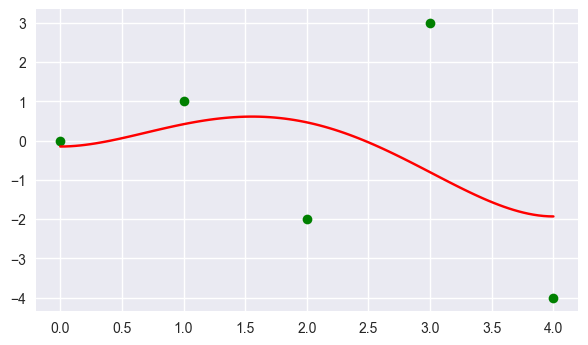

In [62]:
pY = plt.plot(t, y, 'og')
pL = plt.plot(ts, ys, 'r')

Посчитаем значение функционала для константы

In [66]:
squared_error(np.array([np.mean(y)]))

29.199999999999999